In [232]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import statsmodels

In [260]:
pvalue_Mes = pd.read_csv('Mes.csv',index_col=0)
pvalue_Pro = pd.read_csv('Pro.csv',index_col=0)
pvalue_Cla = pd.read_csv('Cla.csv',index_col=0)
pvalue_Neu = pd.read_csv('Neu.csv',index_col=0)
pvalue_subtype = pd.read_csv('subcelltype.csv',index_col=0)

gene_Mes = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Mes.csv', index_col=0)
snv_Mes = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Mes.csv', index_col=0)

gene_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Pro.csv', index_col=0)
snv_Pro = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Pro.csv', index_col=0)

gene_Cla = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Cla.csv', index_col=0)
snv_Cla = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Cla.csv', index_col=0)

gene_Neu = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_cpm_subcelltype_Neu.csv', index_col=0)
snv_Neu = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_snv_subcelltype_Neu.csv', index_col=0)

label_all = pd.read_csv('/data8t/mtx/scSNV/dataset_v2/GSE57872/data/processed_profile/GSE57872_real_label.csv', index_col=0)

In [262]:
label_all.subtype.value_counts()

subtype: Mes    74
subtype: Pro    65
subtype: Cla    41
subtype: Neu    23
Name: subtype, dtype: int64

In [165]:
gene_no_zero_Mes = set((gene_Mes == 0).sum(axis=1)[(gene_Mes == 0).sum(axis=1) == 0].index.values)
snv_valid_Mes = (snv_Mes == 1).sum(axis=1)[(snv_Mes == 1).sum(axis=1) > 20].index.values

In [166]:
len(snv_valid_Mes)

673

In [159]:
pvalue_Mes_filtered = pvalue_Mes.loc[set(pvalue_Mes.index.values)- set(gene_no_zero_Mes),snv_valid_Mes]

In [167]:
pvalue_Mes_filtered

,chr1__13940864,chr1__13942731,chr1__20982631,chr1__25168124,chr1__36752433,chr1__52290984,chr1__93620393,chr1__95001600,chr1__109486196,chr1__145116679,...,chr17__41845824,chr17__41846468,chr18__33750046,chr7__105906370,chr7__99690690,chr11__57381989,chr1__230838331,chr6__99850829,chr15__40330518,chr7__99693552
ENSG00000197461.9,0.093877,0.834316,0.010220,0.002298,0.270089,0.460034,0.759937,0.921523,0.037835,0.378384,...,0.488396,0.097058,0.991869,0.980233,0.606560,0.802435,0.443602,6.106553e-01,0.840584,0.570720
ENSG00000166333.9,0.131837,0.018955,0.000485,0.001092,0.160117,0.638254,0.012301,0.008678,0.149591,0.051020,...,0.121983,0.246582,0.180410,0.416306,0.209383,0.672565,0.642496,8.493351e-01,0.858481,0.230500
ENSG00000011105.7,0.977541,0.471395,0.276415,0.729677,0.681388,0.739515,0.681655,0.979129,0.599595,0.705004,...,0.338207,0.254470,0.089029,0.656632,0.949437,0.991030,0.578459,9.207277e-01,0.578459,0.837866
ENSG00000140600.12,0.004012,0.008326,0.194811,0.320693,0.621391,0.715587,0.171045,0.113725,0.068054,0.413325,...,0.614669,0.349649,0.288727,0.073353,0.380674,0.102868,0.612843,8.045240e-01,0.767569,0.206504
ENSG00000029993.10,0.983191,0.283594,0.528640,0.424127,0.753480,0.263561,0.146586,0.022307,0.017341,0.991333,...,0.051173,0.073316,0.982860,0.104628,0.783817,0.020682,0.511644,3.059947e-02,0.700630,0.624815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000135049.11,0.554114,0.483720,0.161754,0.492495,0.490731,0.747721,0.543351,0.341111,0.439779,0.943544,...,0.353536,0.204593,0.086885,0.794462,0.387395,0.519806,0.152192,1.596821e-01,0.191809,0.395424
ENSG00000173432.6,0.037719,0.155394,0.942403,0.272022,0.308537,0.078737,0.287945,0.088517,0.626717,0.825056,...,0.427636,0.963872,0.002915,0.307127,0.098149,0.012429,0.116129,3.571473e-10,0.229311,0.148597
ENSG00000197329.7,0.842877,0.983880,0.690569,0.309217,0.471654,0.507314,0.223612,0.067040,0.482954,0.647973,...,0.709404,0.872926,0.673443,0.909444,0.296351,0.457645,0.299955,1.471708e-01,0.134628,0.528479
ENSG00000136147.12,0.000035,0.622846,0.688275,0.953724,0.176361,0.314260,0.453930,0.953727,0.080463,0.095930,...,0.597156,0.982616,0.196929,0.035156,0.374282,0.982666,0.079311,7.105767e-01,0.524325,0.616208


In [222]:
pvalue_Mes_filtered.values

array([[9.38765604e-02, 8.34315796e-01, 1.02195665e-02, ...,
        6.10655271e-01, 8.40583648e-01, 5.70720219e-01],
       [1.31837018e-01, 1.89548302e-02, 4.85281312e-04, ...,
        8.49335074e-01, 8.58480723e-01, 2.30499521e-01],
       [9.77540863e-01, 4.71395008e-01, 2.76414653e-01, ...,
        9.20727663e-01, 5.78458950e-01, 8.37866405e-01],
       ...,
       [8.42877370e-01, 9.83880301e-01, 6.90569320e-01, ...,
        1.47170767e-01, 1.34627735e-01, 5.28478846e-01],
       [3.52972214e-05, 6.22845675e-01, 6.88274868e-01, ...,
        7.10576708e-01, 5.24325251e-01, 6.16207775e-01],
       [8.47233837e-01, 7.42224959e-01, 7.78753960e-01, ...,
        6.84253188e-02, 9.48614991e-01, 8.86937484e-01]])

In [207]:
row_num_Mes = pvalue_Mes_filtered.shape[0]
col_num_Mes = pvalue_Mes_filtered.shape[1]
tmp = 0
tmp_index_list = []
for i in range(row_num_Mes):
    for j in range(col_num_Mes):
        tmp = tmp +1
        k = pvalue_Mes_filtered.index.values[i] + "____" + pvalue_Mes_filtered.columns.values[j]
        tmp_index_list.append(k)
pvalue_Mes_filtered_one_column = pd.DataFrame({'pvalue':pvalue_Mes_filtered.values.reshape(-1)})
pvalue_Mes_filtered_one_column.index = tmp_index_list

In [227]:
pvalue_Mes_filtered_one_column

,pvalue
ENSG00000197461.9____chr1__13940864,0.093877
ENSG00000197461.9____chr1__13942731,0.834316
ENSG00000197461.9____chr1__20982631,0.010220
ENSG00000197461.9____chr1__25168124,0.002298
ENSG00000197461.9____chr1__36752433,0.270089
...,...
ENSG00000038382.13____chr11__57381989,0.757310
ENSG00000038382.13____chr1__230838331,0.644534
ENSG00000038382.13____chr6__99850829,0.068425
ENSG00000038382.13____chr15__40330518,0.948615


In [235]:
pvalue_Mes_filtered_one_column.pvalue.values[:10]

array([0.09387656, 0.8343158 , 0.01021957, 0.00229817, 0.2700893 ,
       0.46003443, 0.75993747, 0.92152256, 0.0378351 , 0.37838417])

In [242]:
pvalue_Mes_adjusted = statsmodels.stats.multitest.multipletests(pvalue_Mes_filtered_one_column.pvalue.values,alpha=0.01)

/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/statsmodels/stats/multitest.py:162: RuntimeWarning: invalid value encountered in greater
  notreject = pvals > alphacSidak_all
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/statsmodels/stats/multitest.py:256: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


In [244]:
pvalue_Mes_adjusted[0]

array([False, False, False, ..., False, False, False])

In [245]:
pvalue_Mes_filtered_one_column.loc[pvalue_Mes_adjusted[0],]

,pvalue
ENSG00000140600.12____chr11__117039325,2.131941e-08
ENSG00000169122.7____chr7__75659815,4.247377e-09
ENSG00000109861.11____chr11__88045583,4.656465e-09
ENSG00000105287.8____chr8__77895865,3.548448e-12
ENSG00000114019.10____chr5__36686886,1.583993e-09
...,...
ENSG00000173432.6____chr5__151042550,2.156135e-08
ENSG00000173432.6____chr6__29913042,2.207735e-09
ENSG00000173432.6____chr19__1272040,3.018671e-11
ENSG00000173432.6____chr1__203152801,2.290039e-11


In [255]:
df = pd.DataFrame({'gene':gene_Mes.loc['ENSG00000173432.6',], 'snv':snv_Mes.loc['chr19__1272040',]})

In [256]:
df.loc[df.gene>0,]

,gene,snv
SRR1294783,3,0
SRR1294794,3928,1
SRR1294800,6,1
SRR1294813,10232,1
SRR1294814,4,0
SRR1294820,10,1
SRR1294822,784,1
SRR1294827,21100,1
SRR1294828,1,0
SRR1294830,18,1


/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/mtx/software/anaconda3/envs/r_sceqtl/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


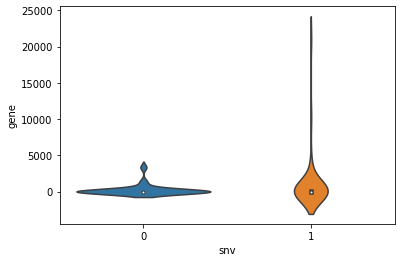

In [253]:
sns.violinplot(x="snv", y="gene", data=df)

In [259]:
pvalue_subtype

,chr1__888639,chr1__1247494,chr1__13940864,chr1__13942731,chr1__20982631,chr1__25168124,chr1__36690047,chr1__36752433,chr1__52290984,chr1__93308798,...,chr6__25343823,chr6__25344086,chr11__85698207,chr7__55250026,chr20__330408,chr7__55312340,chr7__32957661,chr3__187927165,chr1__66628829,chr17__41381981
ENSG00000074800.9,0.064170,2.153317e-07,5.371757e-04,3.265062e-28,3.708607e-139,1.751745e-62,5.400628e-124,3.893577e-53,1.647440e-91,9.776884e-07,...,1.448331e-71,1.590980e-117,4.712865e-67,2.694961e-138,6.677629e-141,1.482023e-68,4.871401e-70,3.511092e-105,2.420222e-12,7.984067e-122
ENSG00000162493.12,0.855269,7.826621e-01,1.590520e-23,7.707147e-07,6.447327e-01,3.851155e-02,8.390503e-01,6.662366e-01,1.436799e-01,7.119298e-01,...,8.641546e-01,9.875064e-01,2.284934e-01,1.440314e-02,4.224487e-01,1.717875e-02,7.178369e-01,9.901802e-01,4.141675e-01,8.774493e-01
ENSG00000127472.6,0.343320,8.039122e-01,1.009307e-01,1.569816e-01,4.766931e-01,5.689346e-01,9.852766e-01,5.272768e-01,8.243073e-01,1.013545e-01,...,8.258830e-01,8.531897e-01,3.253893e-01,1.794161e-02,4.650893e-01,2.060698e-01,3.739333e-04,2.171111e-01,6.467653e-01,5.124978e-01
ENSG00000070831.11,0.908261,4.198816e-01,6.910427e-01,3.134956e-01,7.367480e-01,7.894745e-02,8.407091e-01,1.819063e-01,9.851655e-01,8.290720e-01,...,9.143103e-01,4.713662e-01,2.394156e-01,5.790972e-01,7.134431e-02,3.386571e-01,8.146134e-01,2.404811e-01,4.082898e-01,4.436042e-01
ENSG00000117632.16,0.435825,9.201707e-01,5.640577e-04,3.473060e-02,7.348314e-01,5.020423e-05,1.063621e-01,6.875947e-01,1.902433e-02,5.712448e-01,...,4.189323e-01,4.676648e-01,1.435060e-03,6.901579e-01,7.896800e-01,1.210483e-01,9.103899e-01,1.932897e-01,4.165065e-01,3.857395e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000165704.10,0.652670,7.051378e-01,5.018397e-01,2.497017e-01,4.170113e-01,1.171465e-01,7.847232e-01,1.018565e-01,2.485074e-01,3.065235e-01,...,7.329462e-01,3.154501e-01,8.198909e-01,4.643544e-01,9.063450e-01,7.444724e-01,2.939029e-01,4.474813e-01,5.334579e-02,9.555592e-01
ENSG00000029993.10,0.971319,1.061314e-01,1.336702e-02,2.069811e-01,8.860101e-01,4.126923e-02,5.941487e-01,6.293277e-01,4.516915e-02,1.466158e-01,...,9.559449e-01,9.353458e-01,3.006602e-06,1.044867e-01,3.797169e-01,3.132028e-01,8.434409e-01,3.950360e-01,2.605939e-01,3.773325e-01
ENSG00000011677.8,0.738851,6.650620e-01,6.675582e-01,6.028191e-01,4.497799e-01,5.186247e-01,8.139229e-01,2.008338e-01,7.020088e-01,1.229939e-02,...,1.034691e-01,2.978318e-03,7.211962e-01,8.019219e-01,9.798876e-01,7.268497e-01,2.805607e-01,7.548964e-02,9.826610e-01,2.474988e-01
ENSG00000172534.9,0.630320,7.229332e-01,4.602524e-01,9.238602e-03,3.540423e-01,1.079749e-01,7.785594e-01,9.067585e-01,8.473074e-01,8.284438e-01,...,1.858532e-01,1.160367e-03,3.105360e-03,8.746952e-01,3.357783e-01,8.935454e-01,9.005041e-01,4.994325e-01,8.647224e-01,3.884485e-01
